In [313]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic.csv')

In [314]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [315]:
inputs=df.drop(['PassengerId','Parch','Name','SibSp','Ticket','Cabin','Embarked'],axis='columns')
inputs.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [316]:
from sklearn.preprocessing import LabelEncoder
sex=LabelEncoder()
inputs['Sex']=sex.fit_transform(inputs['Sex'])

In [317]:
import math
inputs.Age.median()
inputs.Age=inputs.Age.fillna(inputs.Age.median())
#inputs.Age.mean()
#inputs.Age=inputs.Age.fillna(inputs.Age.mean())
#inputs['Age'].fillna(inputs['Age'].mode()[0], inplace=True)

In [318]:
inputs.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
5,0,3,1,28.0,8.4583
6,0,1,1,54.0,51.8625
7,0,3,1,2.0,21.0750
8,1,3,0,27.0,11.1333
9,1,2,0,14.0,30.0708


In [319]:
X=inputs.drop(['Survived'],axis='columns')

In [320]:
Y=inputs['Survived']

In [321]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [322]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy',min_samples_split=6,n_estimators=500)

In [323]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=500)

In [324]:
model.score(x_test,y_test)

0.8435754189944135

In [325]:
model.predict([[3,1,22,7.25]])

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

# Code for model confusion matrix.

In [326]:
y_predict=model.predict(x_test)

In [327]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[99,  8],
       [20, 52]])

Text(95.72222222222221, 0.5, 'Truth')

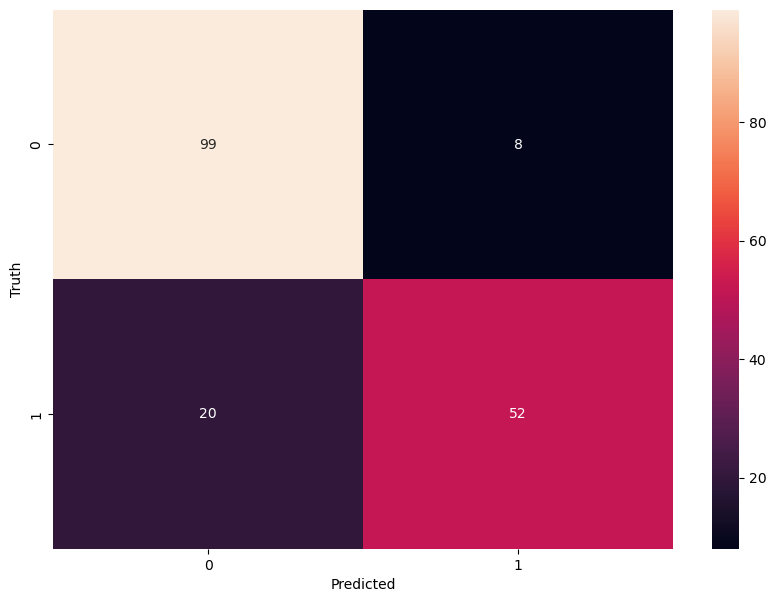

In [332]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')